# Bike Rental Prediction

In [1]:
# Load the required libraries for analysis of data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set working directory
os.chdir("D:/001. Data sc/Project/Bike_Rental")

# lets Check working directory
os.getcwd()

'D:\\001. Data sc\\Project\\Bike_Rental'

In [4]:
# Load the data
Bike_Data = pd.read_csv("day.csv")

# Explore the data

In [5]:
# Check the dimensions(no of rows and no of columns)
Bike_Data.shape

(731, 16)

In [6]:
# Check names of dataset
Bike_Data.columns

# Rename variables in dataset
Bike_Data = Bike_Data.rename(columns = {'instant':'index','dteday':'date','yr':'year','mnth':'month','weathersit':'weather',
                                        'temp':'temperature','hum':'humidity','cnt':'count'})

Bike_Data.columns


Index([u'index', u'date', u'season', u'year', u'month', u'holiday', u'weekday',
       u'workingday', u'weather', u'temperature', u'atemp', u'humidity',
       u'windspeed', u'casual', u'registered', u'count'],
      dtype='object')

In [7]:
#lets see first five observations of our data
Bike_Data.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# lets see last five observations of our data
Bike_Data.tail()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
# Lets see the datatypes of the given data
Bike_Data.dtypes

index            int64
date            object
season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [10]:
# lets Check summary of the dataset 
Bike_Data.describe()

,index,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Variable Identification 
Bike_Data['count'].dtypes

dtype('int64')

In [12]:
#lets drop some variables because it doesnot carry any useful information

Bike_Data = Bike_Data.drop(['casual','registered','index','date'],axis=1)

# Lets check dimensions of data after removing some variables
Bike_Data.shape


(731, 12)

In [13]:
# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

# EDA or Data Preprocessing

In [14]:
# Missing Value anlysis

# to check if there is any missing values
Missing_val = Bike_Data.isnull().sum()
Missing_val
# In our dataset we dont have any missing values.so that we dont need to do any imputation methods 

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

temperature


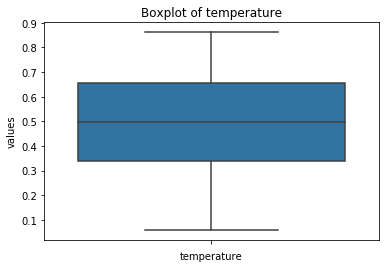

atemp


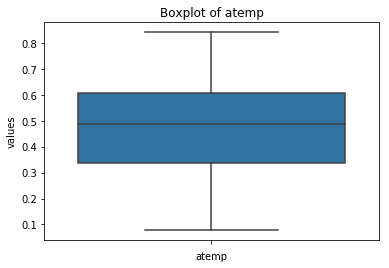

humidity


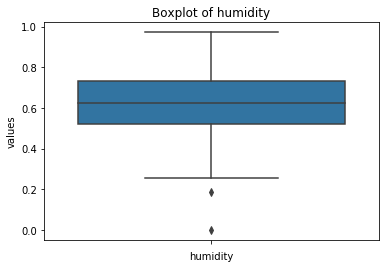

windspeed


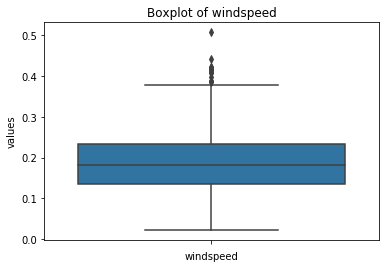

count


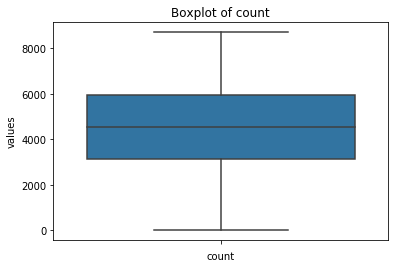

In [15]:
# Outlier Analysis

# Lets save copy of dataset before preprocessing
df = Bike_Data.copy()
Bike_Data = df.copy() 

# Using seaborn library, we can viualize the outliers by plotting box plot
for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Data[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()
    
# From boxplot we can see inliers in humidity and outliers in windspeed

In [16]:
# Lets detect and remove outliers
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(Bike_Data[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    Minimum = q25 - (1.5 * IQR)
    print(Minimum)
    Maximum = q75 + (1.5 * IQR)
    print(Maximum)
    
    Minimum = Bike_Data.loc[Bike_Data[i] < Minimum ,i] 
    Maximum = Bike_Data.loc[Bike_Data[i] > Maximum ,i]

#we substituted minimum values for inliers and maximum values for outliers.
#from that we removed all the outliers.   

temperature
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
humidity
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125
count
-1054.0
10162.0


temperature


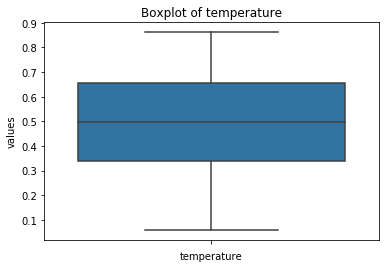

atemp


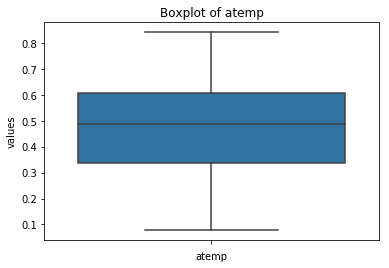

humidity


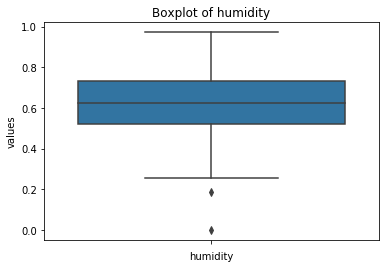

windspeed


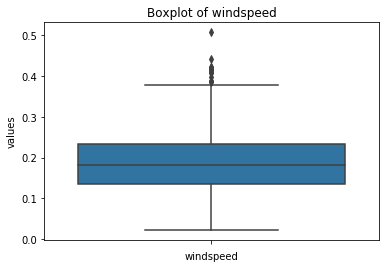

count


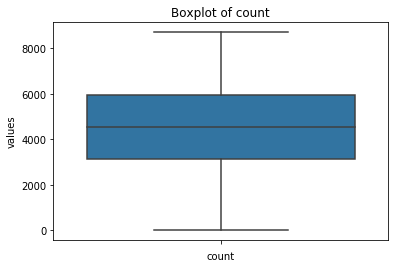

In [17]:
# after replacing the outliers,let us plot boxplot for understanding
for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Data[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

# Visualization

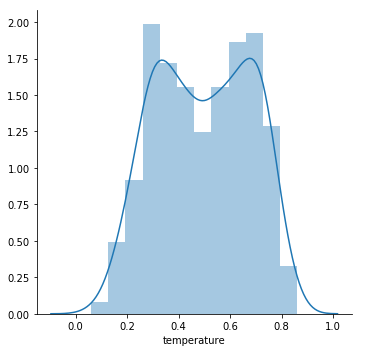

In [18]:
# Univariate Analysis 

# temperature 
sns.FacetGrid(Bike_Data , height = 5).map(sns.distplot,'temperature').add_legend()
#normally distributed

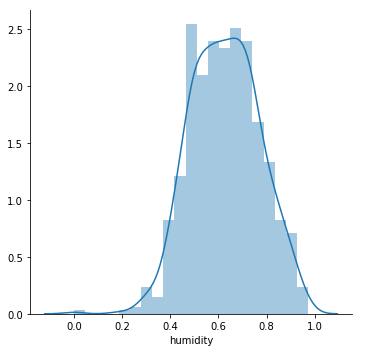

In [19]:
# humidity 
sns.FacetGrid(Bike_Data , height = 5).map(sns.distplot,'humidity').add_legend()
#normally distributed

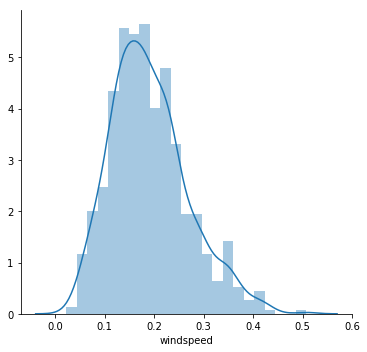

In [20]:
# windspeed
sns.FacetGrid(Bike_Data , height = 5).map(sns.distplot,'windspeed').add_legend()
#normally distributed

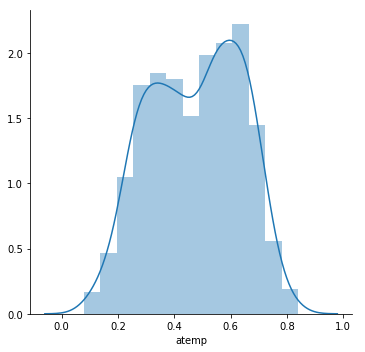

In [21]:
#atemp
sns.FacetGrid(Bike_Data , height = 5).map(sns.distplot,'atemp').add_legend()
#normally distributed

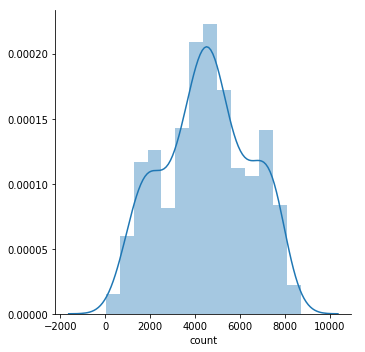

In [22]:
# count
sns.FacetGrid(Bike_Data , height = 5).map(sns.distplot,'count').add_legend()
#normally distributed

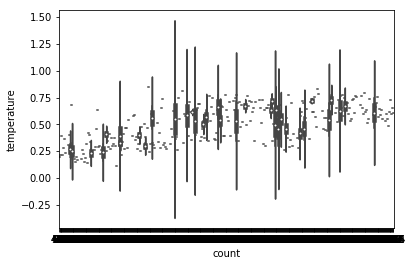

In [23]:
# Bivariate Analysis ------------------------------------------------------
# Lets check impact of continous variables on target variable

# count vs temperature
sns.violinplot(x='count',y='temperature',data=Bike_Data)

#temperature is directly proportional to each other
#as temperature increases bike rental count also increases

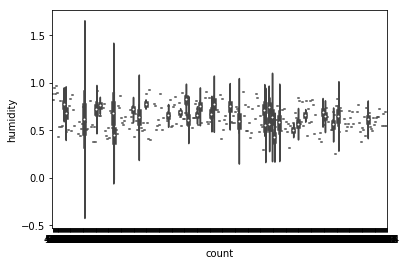

In [25]:
# count vs humidity

sns.violinplot(x='count',y='humidity',data=Bike_Data)

# Apart from humidity,Bike rental count does not get affected

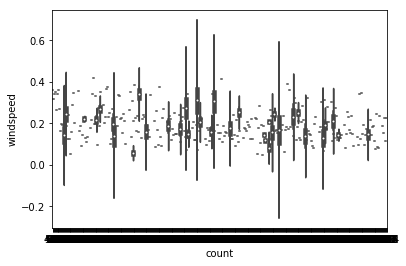

In [26]:
# count vs windspeed

sns.violinplot(x='count',y='windspeed',data=Bike_Data)

# Apart from windspeed, Bike rental count does not get affected

season
1     471348
2     918589
3    1061129
4     841613
Name: count, dtype: int64


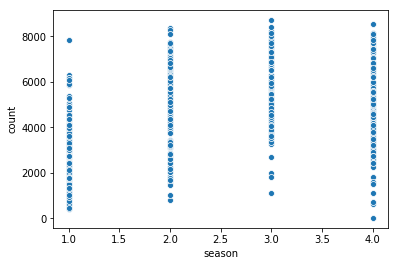

In [27]:
#for categorical variables


# SEASON
print(Bike_Data.groupby(['season'])['count'].sum())
#based on the season, bike rental count is high in season 3 which is fall and low in season 1 which is spring

#lets visualize the count using scatterplot
sns.scatterplot(x='season',y='count',data = Bike_Data)

year
0    1243103
1    2049576
Name: count, dtype: int64


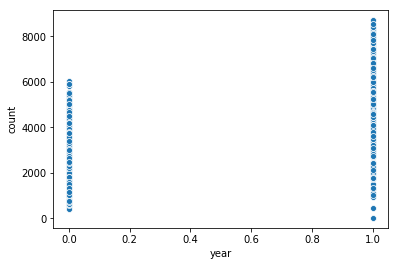

In [28]:
# YEAR
print(Bike_Data.groupby(['year'])['count'].sum())
#based on the year, bike rental count is high in the year 1 which is 2012

#lets visualize the count using scatterplot
sns.scatterplot(x='year',y='count',data = Bike_Data)

month
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: count, dtype: int64


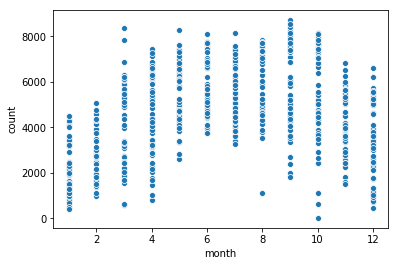

In [29]:
# MONTH
print(Bike_Data.groupby(['month'])['count'].sum())
#Based on the month, Bike rental count is high in 8 which is in august and low in 1 which is in january

#lets visualize the count using scatterplot
sns.scatterplot(x='month',y='count',data = Bike_Data)

holiday
0    3214244
1      78435
Name: count, dtype: int64


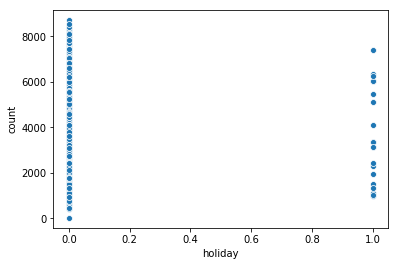

In [30]:
#HOLIDAY
print(Bike_Data.groupby(['holiday'])['count'].sum())
#Based on the holiday, bike rental count is high in 0 which is holiday and low in 1 which is working day

#lets visualize the count using scatterplot
sns.scatterplot(x='holiday',y='count',data = Bike_Data)

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: count, dtype: int64


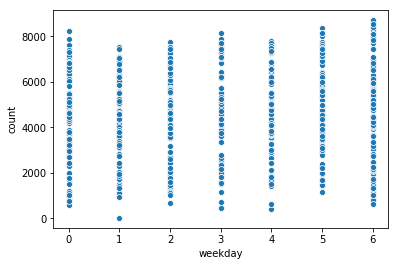

In [31]:
# WEAKDAY
print(Bike_Data.groupby(['weekday'])['count'].sum())
#Based on the weakday, bike rental count is high in 5 which is friday and low in 0 which is sunday

#lets visualize the count using scatterplot
sns.scatterplot(x='weekday',y='count',data = Bike_Data)

workingday
0    1000269
1    2292410
Name: count, dtype: int64


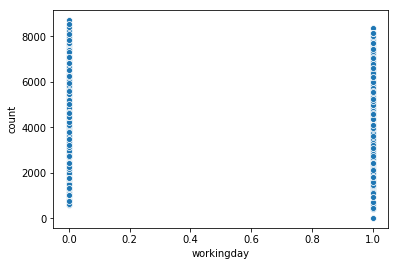

In [32]:
# WORKINGDAY
print(Bike_Data.groupby(['workingday'])['count'].sum())
#Based on the workingday, Bike rental count is high in 1 which is working day and low in 0 which is hoiday

#lets visualize the count using scatterplot
sns.scatterplot(x='workingday',y='count',data = Bike_Data)

weather
1    2257952
2     996858
3      37869
Name: count, dtype: int64


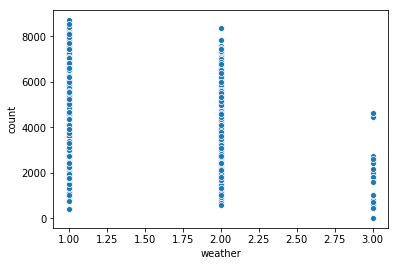

In [33]:
#WEATHER
print(Bike_Data.groupby(['weather'])['count'].sum())
#Based n the weather bike rental count is higher in 1 which clear,few clouds,partly cloudy and there is no bikes rental in 4

#lets visualize the count using scatterplot
sns.scatterplot(x='weather',y='count',data = Bike_Data)

Text(0.5,0,'temperature')

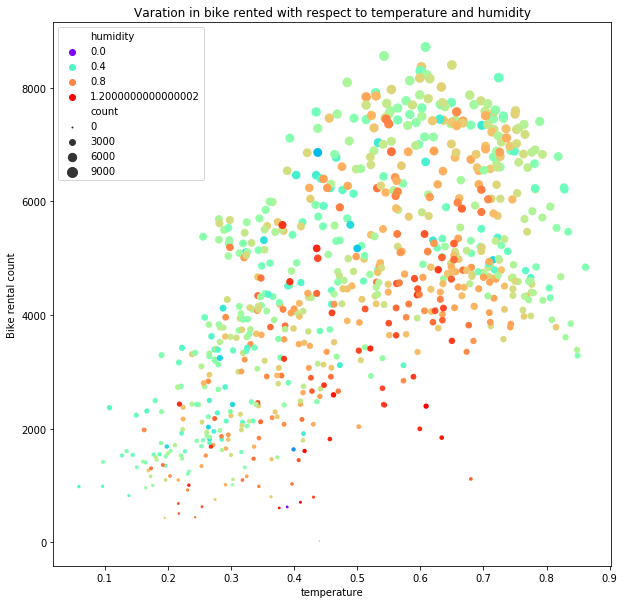

In [34]:
# Bike rented with respected to tempeature and humidity
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="humidity", size="count",
                palette="rainbow",sizes=(1, 100), linewidth=0,
                data=Bike_Data,ax=ax)
plt.title("Varation in bike rented with respect to temperature and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("temperature")

# based on the below plot we know that bike rental is higher when the 
                            #temperature is between 0.4 to 0.8 
                            #humidity less than 0.8

Text(0.5,0,'temperature')

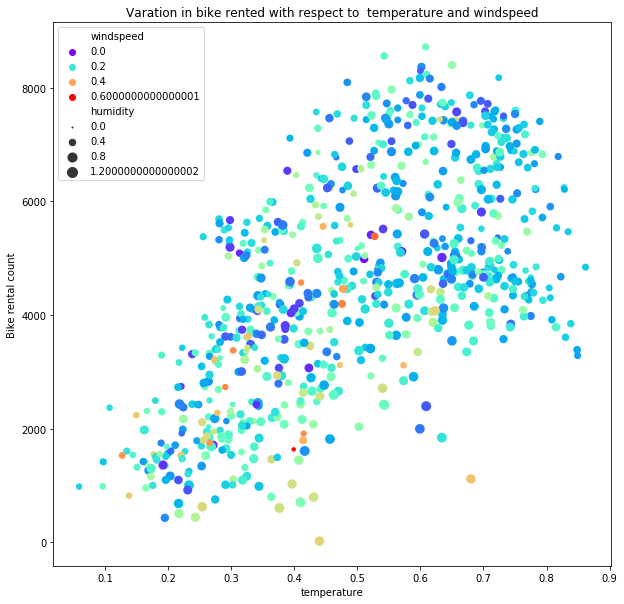

In [35]:
#Bikes rented with respect to temperature and windspeed
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temperature", y="count",
                hue="windspeed", size="humidity",
                palette="rainbow",sizes=(1, 100), linewidth=0,
                data=Bike_Data,ax=ax)
plt.title("Varation in bike rented with respect to  temperature and windspeed")
plt.ylabel("Bike rental count")
plt.xlabel("temperature")

#based on the below plot we know that bike rental is higher when the 
                            #temperature is between 0.4 to 0.8 
                            #humidity is less than 0.8
                            #windspeed is less than 0.2

Text(0.5,0,'Normalized temperature')

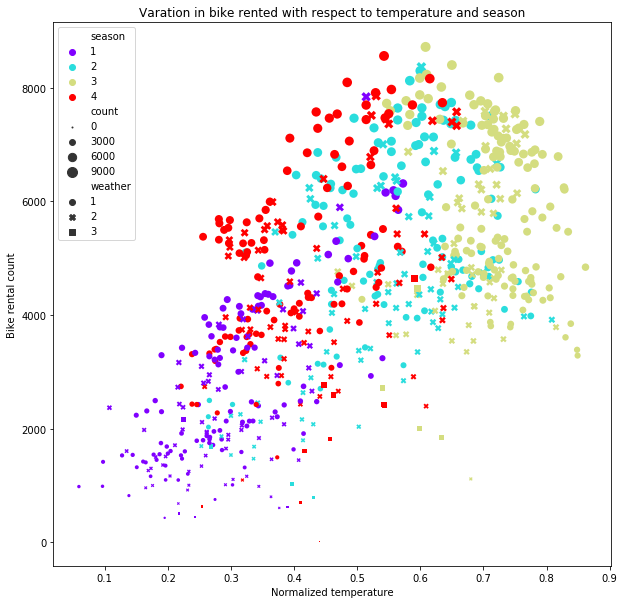

In [36]:
# Bikes rented with respect to temperature and season
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temperature", y="count",
                hue="season", size="count",style= "weather",
                palette="rainbow",sizes=(1, 100), linewidth=0,
                data=Bike_Data,ax=ax)
plt.title("Varation in bike rented with respect to temperature and season")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")

#based on the below plot we know that bike rental is higher when the 
                            #temperature is between 0.4 to 0.8 
                            #season was 2 and 3
                            #weather was from 1 and 2

# Feature Selection

In [37]:
# Lets save dataset after outlier analysis 
df =  Bike_Data.copy()
Bike_Data = df.copy()

In [39]:
# Correlation analysis

# Correlation matrix continuous variables
Bike_corr= Bike_Data.loc[:,cnames]

# Generate correlation matrix
corr_matrix = Bike_corr.corr()
print(corr_matrix)

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.126963  -0.157944  0.627494
atemp           0.991702  1.000000  0.139988  -0.183643  0.631066
humidity        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed      -0.157944 -0.183643 -0.248489   1.000000 -0.234545
count           0.627494  0.631066 -0.100659  -0.234545  1.000000


Text(0.5,1,'Correlation Plot For Numeric or Continous Variables')

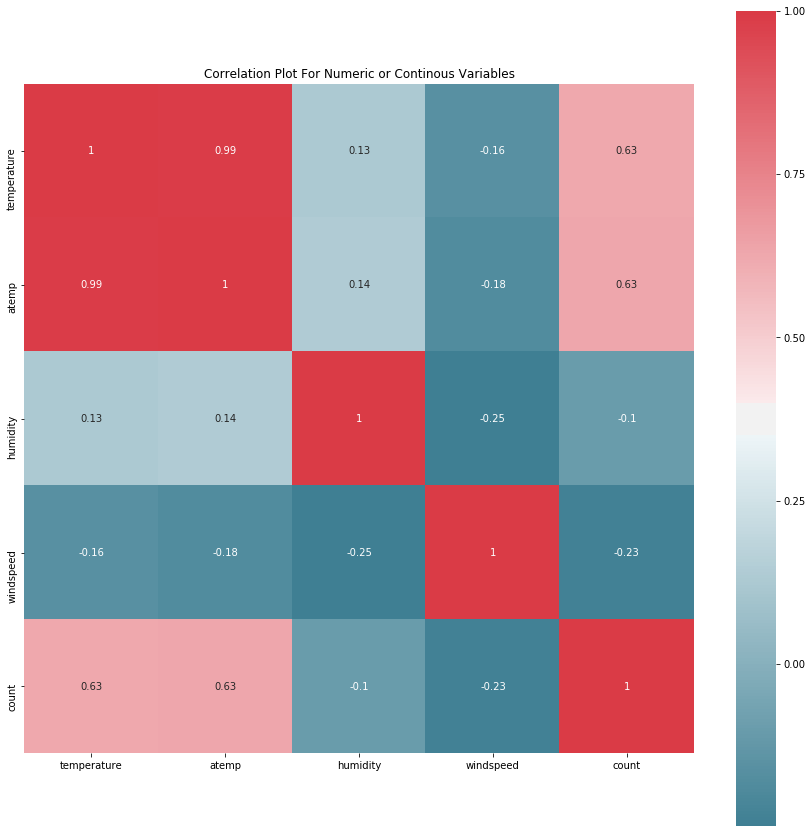

In [40]:
# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(15,15))

#Plot using seaborn library
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.title("Correlation Plot For Numeric or Continous Variables")

#from the below plot,we came to know that both temperature and atemp variables are carrying almost same information
#hence there is no need to continue with both variables.
#so we need to drop any one of the variables
#here I am dropping atemp variables

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
# ANOVA test for categorical variables

for i in cat_cnames:
    mod = ols('count' + '~' + i, data = Bike_Data).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

In [43]:
#based on the anova result, we are going to drop three variables namely,
                            #HOLIDAY
                            #WEEKDAY
                            #WORKINGDAY
            #because these variables having the p-value > 0.05

In [44]:
# Removing the variables which has p-value > 0.05 and correlated variable
Bike_Data = Bike_Data.drop(['atemp', 'holiday','weekday','workingday'], axis=1)

In [45]:
# After removing variables lets check dimension of the data
Bike_Data.shape

(731, 8)

In [46]:
# After removing variables lets check column names of the data
Bike_Data.columns

Index([u'season', u'year', u'month', u'weather', u'temperature', u'humidity',
       u'windspeed', u'count'],
      dtype='object')

In [47]:
#after removing the variables, we need update numerical and categorical variables

# numerical variable
cnames = ['temperature','humidity', 'windspeed', 'count']

# Categorical variables
catnames = ['season', 'year', 'month','weather']

# Feature scaling

In [48]:
#based on the details of the attributes given, all the numerical variables are normalised

temperature


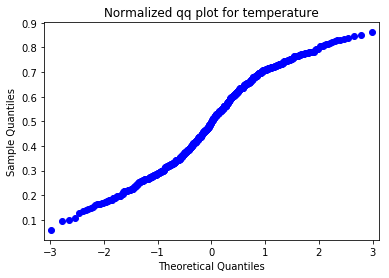

humidity


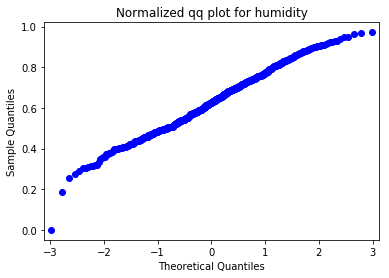

windspeed


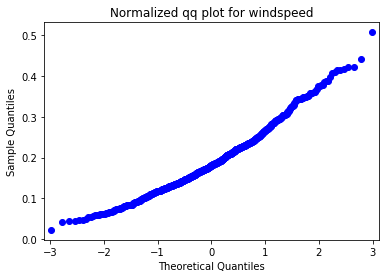

count


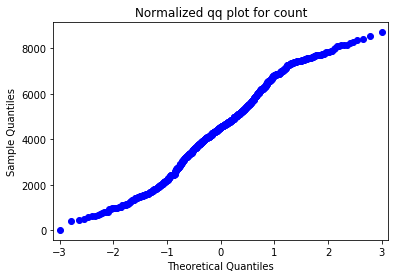

In [49]:
#lets visualise the numerical variables to see normality
for i in cnames:
    print(i)
    sm.qqplot(Bike_Data[i])
    plt.title("Normalized qq plot for " +i)
    plt.show()

temperature


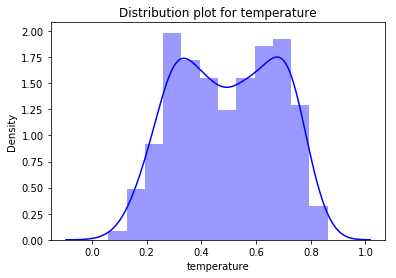

humidity


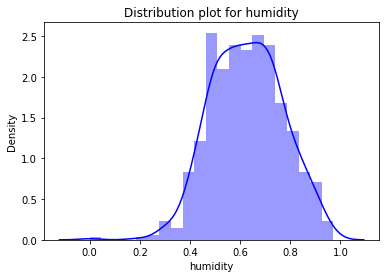

windspeed


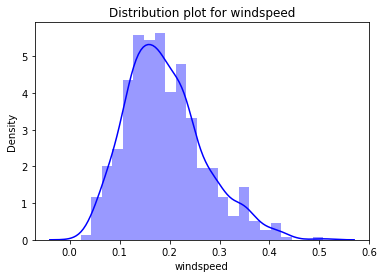

count


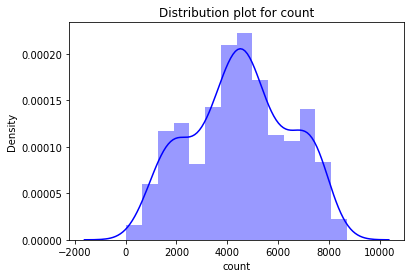

In [50]:
for i in cnames:
    print(i)
    sns.distplot(Bike_Data[i],bins='auto',color='blue')
    plt.title("Distribution plot for "+i)
    plt.ylabel("Density")
    plt.show()

In [51]:
Bike_Data.describe()

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [52]:
#we confirmed the normalized data based on the qqplot,distribution plot and summary of the data

# Model Development

In [53]:
# Load Required libraries for model development 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [54]:
#In Regression problems, we can't pass directly categorical variables.
#so we need to convert all categorical variables into dummy variables

df = Bike_Data
Bike_Data = df

#  Converting categorical variables to dummy variables
Bike_Data = pd.get_dummies(Bike_Data,columns=catnames)


In [55]:
Bike_Data.shape

(731, 25)

In [56]:
Bike_Data.columns

Index([u'temperature', u'humidity', u'windspeed', u'count', u'season_1',
       u'season_2', u'season_3', u'season_4', u'year_0', u'year_1', u'month_1',
       u'month_2', u'month_3', u'month_4', u'month_5', u'month_6', u'month_7',
       u'month_8', u'month_9', u'month_10', u'month_11', u'month_12',
       u'weather_1', u'weather_2', u'weather_3'],
      dtype='object')

In [57]:
# Lets Divide the data into train and test set 

X= Bike_Data.drop(['count'],axis=1)
y= Bike_Data['count']

In [58]:
# Divide data into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20)

In [59]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [60]:
# Linear Regression model

In [61]:
# Import libraries
import statsmodels.api as sm

# Linear Regression model
LinearRegression_model= sm.OLS(y_train,X_train).fit()
print(LinearRegression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          4.82e-207
Time:                        03:05:37   Log-Likelihood:                -4729.1
No. Observations:                 584   AIC:                             9500.
Df Residuals:                     563   BIC:                             9592.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  4656.1992    483.773      9.625      

In [62]:
# Model prediction on  train data
LinearRegression_train= LinearRegression_model.predict(X_train)

# Model prediction on test data
LinearRegression_test= LinearRegression_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,LinearRegression_train)

# Model performance on test data
MAPE_test= MAPE(y_test,LinearRegression_test)

# r2 value for train data
r2_train= r2_score(y_train,LinearRegression_train)

# r2 value for test data-
r2_test=r2_score(y_test,LinearRegression_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LinearRegression_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LinearRegression_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=45.6629117908
Mean Absolute Precentage Error for test data=15.6106019872
R^2_score for train data=0.8375477122429148
R^2_score for test data=0.8422177986233883
RMSE for train data=795.4050520320877
RMSE for test data=705.964421076535


In [63]:
Error_MetricsLT = {'Model Name': ['Linear Regression'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}

LinearRegression_Results = pd.DataFrame(Error_MetricsLT)

In [64]:
LinearRegression_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,15.610602,45.662912,Linear Regression,0.842218,0.837548,705.964421,795.405052


In [65]:
#Decision tree model

In [66]:
# Lets Build decision tree model on train and test data
from sklearn.tree import DecisionTreeRegressor

# Decision tree for regression
DecisionTree_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Model prediction on train data
DecisionTree_train= DecisionTree_model.predict(X_train)

# Model prediction on test data
DecisionTree_test= DecisionTree_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,DecisionTree_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DecisionTree_test)

# r2 value for train data
r2_train= r2_score(y_train,DecisionTree_train)

# r2 value for test data
r2_test=r2_score(y_test,DecisionTree_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DecisionTree_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DecisionTree_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=81.9450761428
Mean Absolute Precentage Error for test data=26.0184862478
R^2_score for train data=0.6945929982518075
R^2_score for test data=0.6184953327611868
RMSE for train data=1090.5985701139036
RMSE for test data=1097.7507345140211


In [67]:
Error_MetricsDT = {'Model Name': ['Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
DecisionTree_Results = pd.DataFrame(Error_MetricsDT)

In [68]:
DecisionTree_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,26.018486,81.945076,Decision Tree,0.618495,0.694593,1097.750735,1090.59857


In [69]:
# Random Search CV In Decision Tree

In [70]:
# Import libraries 
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

# Lets build a model using above parameters on train data 
RandomDecisionTree_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RandomDecisionTree_model= RandomDecisionTree_model.fit(X_train,y_train)


In [71]:
# Lets look into best fit parameters
best_parameters = RandomDecisionTree_model.best_params_
print(best_parameters)

{'max_depth': 7}


In [72]:
# Again rebuild decision tree model using randomsearch best fit parameter ie
# with maximum depth = 7
RDT_best_model = RandomDecisionTree_model.best_estimator_
print(RDT_best_model)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


In [73]:
# Prediction on train data 
RDT_train = RDT_best_model.predict(X_train)

# Prediction on test data 
RDT_test = RDT_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,RDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,RDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,RDT_train)

# Rsquare for test data
r2_test=r2_score(y_test,RDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RDT_test))


# Lets print the results 
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Best Parameter={'max_depth': 7}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=8.54296409335
Mean Absolute Precentage Error for test data=18.3692024987
R^2_score for train data=0.9413376840726594
R^2_score for test data=0.7580367685515679
RMSE for train data=477.9748344604188
RMSE for test data=874.235618311481


In [74]:
Error_MetricsRDT = {'Model Name': ['Random Search CV Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomDecisionTree_Results = pd.DataFrame(Error_MetricsRDT)

In [75]:
RandomDecisionTree_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,18.369202,8.542964,Random Search CV Decision Tree,0.758037,0.941338,874.235618,477.974834


In [76]:
# Grid Search CV in Decision Tree

In [77]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

# Lets build a model using above parameters on train data
GridDecisionTree_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GridDecisionTree_model= GridDecisionTree_model.fit(X_train,y_train)

In [78]:
# Lets look into best fit parameters from gridsearch cv DT
best_parameters = GridDecisionTree_model.best_params_
print(best_parameters)

{'max_depth': 7}


In [79]:
# Again rebuild decision tree model using gridsearch best fit parameter ie
# with maximum depth = 7
GDT_best_model = GridDecisionTree_model.best_estimator_

In [80]:
# Prediction on train data 
GDT_train = GDT_best_model.predict(X_train)

# Prediction on train data  test data-
GDT_test = GDT_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,GDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,GDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,GDT_train)

# Rsquare for train data
r2_test=r2_score(y_test,GDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GDT_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Best Parameter={'max_depth': 7}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=8.54296409335
Mean Absolute Precentage Error for test data=18.3692024987
R^2_score for train data=0.9413376840726594
R^2_score for test data=0.7580367685515679
RMSE for train data=477.9748344604188
RMSE for test data=874.235618311481


In [81]:
Error_MetricsGDT = {'Model Name': ['Grid Search CV Decision Tree'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
GridDecisionTree_Results = pd.DataFrame(Error_MetricsGDT)

In [82]:
GridDecisionTree_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,18.369202,8.542964,Grid Search CV Decision Tree,0.758037,0.941338,874.235618,477.974834


In [83]:
# Random Forest

In [84]:
# Import libraris
from sklearn.ensemble import RandomForestRegressor

# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Prediction on train data
RF_train= RF_model.predict(X_train)

# Prediction on test data
RF_test= RF_model.predict(X_test)

# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Mean Absolute Precentage Error for train data=17.8630716052
Mean Absolute Precentage Error for test data=16.141011387
R^2_score for train data=0.9816128211078102
R^2_score for test data=0.8427013782416863
RMSE for train data=267.59807190446327
RMSE for test data=704.8817514799115


In [85]:
Error_MetricsRF = {'Model Name': ['Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomForest_Results = pd.DataFrame(Error_MetricsRF)

In [86]:
RandomForest_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,16.141011,17.863072,Random Forest,0.842701,0.981613,704.881751,267.598072


In [87]:
# Random Search CV in Random Forest

In [88]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

# Lets build a model using above parameters on train data
RandomRandomForest_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RandomRandomForest_model= RandomRandomForest_model.fit(X_train,y_train)

In [89]:
# Best parameters for model
best_parameters = RandomRandomForest_model.best_params_
print(best_parameters)

{'n_estimators': 91, 'max_depth': 17}


In [90]:
# Again rebuild random forest  model using gridsearch best fit parameter
RRF_best_model = RandomRandomForest_model.best_estimator_

In [91]:
# Prediction on train data
RRF_train = RRF_best_model.predict(X_train)

# Prediction on test data
RRF_test = RRF_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data 
MAPE_train= MAPE(y_train,RRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,RRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,RRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,RRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RRF_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'n_estimators': 91, 'max_depth': 17}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=19.796989964
Mean Absolute Precentage Error for test data=16.5079588803
R^2_score for train data=0.9814052743927896
R^2_score for test data=0.8418466972980656
RMSE for train data=269.10410102253525
RMSE for test data=706.7941422526643


In [92]:
Error_MetricsRSRF = {'Model Name': ['Random Search CV Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
RandomSearchRandomForest_Results = pd.DataFrame(Error_MetricsRSRF)

In [93]:
RandomSearchRandomForest_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,16.507959,19.79699,Random Search CV Random Forest,0.841847,0.981405,706.794142,269.104101


In [94]:
# Grid search CV in Random Forest

In [95]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [96]:
# Lets build a model using above parameters on train data using random forest grid search cv 
GridRandomForest_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GridRandomForest_model= GridRandomForest_model.fit(X_train,y_train)

In [97]:
# Best fit parameters for model
best_parameters_GRF = GridRandomForest_model.best_params_
print(best_parameters_GRF)

{'n_estimators': 19, 'max_depth': 11}


In [98]:
# Again rebuild random forest model using gridsearch best fit parameter 
GRF_best_model = GridRandomForest_model.best_estimator_

In [99]:
# Prediction on train data
GRF_train = GRF_best_model.predict(X_train)

# Prediction on test data
GRF_test = GRF_best_model.predict(X_test)

# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value
# MAPE for train data
MAPE_train= MAPE(y_train,GRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,GRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,GRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,GRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GRF_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'n_estimators': 91, 'max_depth': 17}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=19.5502374641
Mean Absolute Precentage Error for test data=16.8697548398
R^2_score for train data=0.9743198710899773
R^2_score for test data=0.829209016862929
RMSE for train data=316.24526298399167
RMSE for test data=734.4906606460896


In [100]:
Error_MetricsGSRF = {'Model Name': ['Grid search CV Random Forest'],
                 'MAPE_Train':[MAPE_train],
                 'MAPE_Test':[MAPE_test],
                 'R-squared_Train':[r2_train],
                 'R-squared_Test':[r2_test],
                 'RMSE_train':[RMSE_train],
                 'RMSE_test':[RMSE_test]}
                   
GridSearchRandomForest_Results = pd.DataFrame(Error_MetricsGSRF)

In [101]:
GridSearchRandomForest_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,16.869755,19.550237,Grid search CV Random Forest,0.829209,0.97432,734.490661,316.245263


In [102]:
Final_Results = pd.concat([LinearRegression_Results,
                                DecisionTree_Results,
                                RandomDecisionTree_Results,
                                GridDecisionTree_Results,
                                RandomForest_Results,
                                RandomSearchRandomForest_Results,
                                GridSearchRandomForest_Results,], ignore_index=True, sort =False)

In [103]:
Final_Results

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train,RMSE_test,RMSE_train
0,15.610602,45.662912,Linear Regression,0.842218,0.837548,705.964421,795.405052
1,26.018486,81.945076,Decision Tree,0.618495,0.694593,1097.750735,1090.598570
2,18.369202,8.542964,Random Search CV Decision Tree,0.758037,0.941338,874.235618,477.974834
3,18.369202,8.542964,Grid Search CV Decision Tree,0.758037,0.941338,874.235618,477.974834
4,16.141011,17.863072,Random Forest,0.842701,0.981613,704.881751,267.598072
5,16.507959,19.796990,Random Search CV Random Forest,0.841847,0.981405,706.794142,269.104101
6,16.869755,19.550237,Grid search CV Random Forest,0.829209,0.974320,734.490661,316.245263


In [104]:
# From above results Random Forest model have optimum values and this
# algorithm is good for our data 

# Lets save the out put of finalized model (RF)

input = y_test.reset_index()
pred = pd.DataFrame(RF_test,columns = ['pred'])
Final_output = pred.join(input)

In [105]:
Final_output

,pred,index,count
0,7141.30,594,7148
1,4465.95,290,4748
2,4686.90,265,2395
3,4144.33,142,4274
4,4476.98,246,4940
5,4470.88,169,4744
6,1491.07,361,2302
7,2965.10,96,3141
8,2442.38,250,1842
9,4054.27,299,2659


In [106]:
Final_output.to_csv("Final_results_py.csv")
